# <2주차 MLstudy 강의정리 및 코드실습>

### Lab 04 Multi-variable linear regression (Hypothesis using matrix)

H(x1,x2,x3) = w1x1 + w2x2 + w3x3

In [48]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

tf.random.set_seed(777)
print(tf.__version__)

2.0.0


In [49]:
tf.random.set_seed(0)

Matrix를 사용하지 않고 계산할 때의 코드

In [50]:
#실제 데이터 값
x1 = [73., 93., 89., 96., 73.]
x2 = [80., 88., 91., 98., 66.]
x3 = [75., 93., 90., 100.,70.]
y = [152., 185., 180., 196., 142.]

# random weights 값
w1 = tf.Variable(tf.random.normal([1]))
w2 = tf.Variable(tf.random.normal([1]))
w3 = tf.Variable(tf.random.normal([1]))
b = tf.Variable(tf.random.normal([1]))

learning_rate = 0.000001

for i in range(1000+1):
    with tf.GradientTape() as tape:
        hypothesis = w1 * x1 + w2 * x2 + w3*x3 + b
        cost = tf.reduce_mean(tf.square(hypothesis - y))
    w1_grad, w2_grad, w3_grad, b_grad = tape.gradient(cost, [w1,w2,w3, b])
    
    # 데이터값 업데이트
    w1.assign_sub(learning_rate * w1_grad)
    w2.assign_sub(learning_rate * w2_grad)
    w3.assign_sub(learning_rate * w3_grad)
    b.assign_sub(learning_rate * b_grad)

    if i % 50 == 0:
        print("{:5}| {:12.4f}".format(i,cost.numpy()))

    0|   11325.9121
   50|     135.3618
  100|      11.1817
  150|       9.7940
  200|       9.7687
  250|       9.7587
  300|       9.7489
  350|       9.7389
  400|       9.7292
  450|       9.7194
  500|       9.7096
  550|       9.6999
  600|       9.6903
  650|       9.6806
  700|       9.6709
  750|       9.6612
  800|       9.6517
  850|       9.6421
  900|       9.6325
  950|       9.6229
 1000|       9.6134


Matrix를 사용할 때의 코드

[5X3]x값 matrix에 [3X1]w값 matrix를 dot product내적 한다.

In [51]:
data = np.array([
    [ 73., 80., 75., 152. ],
    [ 93., 88., 93., 185. ],
    [ 89., 91., 90., 180. ],
    [ 96., 98., 100., 196.],
    [ 73., 66., 70., 142. ]], dtype=np.float32)

X = data[:, :-1]
y = data[:, [-1]]
W = tf.Variable(tf.random.normal([3, 1]))
b = tf.Variable(tf.random.normal([1]))

learning_rate = 0.000001

# hypothesis, prediction function H(x)=XW
def predict(X):
    return tf.matmul(X, W) + b

n_epochs = 2000
for i in range(n_epochs+1):
    with tf.GradientTape() as tape:
        cost = tf.reduce_mean((tf.square(predict(X) - y)))
        W_grad, b_grad = tape.gradient(cost, [W, b])
        W.assign_sub(learning_rate * W_grad)
        b.assign_sub(learning_rate * b_grad)
        
        if i %100==0:
            print("{:5}|{:10.4f}".format(i,cost.numpy()))

    0| 5455.5903
  100|   31.7443
  200|   30.9326
  300|   30.7894
  400|   30.6468
  500|   30.5055
  600|   30.3644
  700|   30.2242
  800|   30.0849
  900|   29.9463
 1000|   29.8081
 1100|   29.6710
 1200|   29.5348
 1300|   29.3989
 1400|   29.2641
 1500|   29.1299
 1600|   28.9961
 1700|   28.8634
 1800|   28.7313
 1900|   28.5997
 2000|   28.4689


### Lab 05-2 Logistic Regression - cost function & optimizer

x_data들의 위치를 좌표평면 위에 보여주고 y_data를 0과 1로 구분

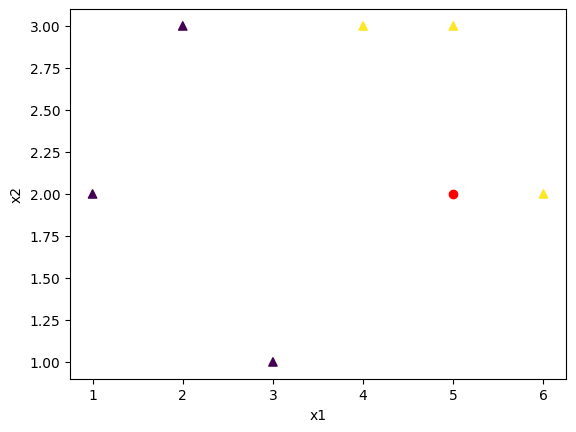

In [52]:
#실제 데이터 값
x_train = [[1., 2.],
          [2., 3.],
          [3., 1.],
          [4., 3.],
          [5., 3.],
          [6., 2.]]
y_train = [[0.],
          [0.],
          [0.],
          [1.],
          [1.],
          [1.]]

#테스트할 데이터 값
x_test = [[5.,2.]]
y_test = [[1.]]


x1 = [x[0] for x in x_train]
x2 = [x[1] for x in x_train]

#색으로 0,1 구분하기
colors = [int(y[0] % 3) for y in y_train]
plt.scatter(x1,x2, c=colors , marker='^')
plt.scatter(x_test[0][0],x_test[0][1], c="red")

plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

In [53]:
dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(len(x_train))

In [54]:
# weight 와 bias 설정
W = tf.Variable(tf.zeros([2,1]), name='weight')
b = tf.Variable(tf.zeros([1]), name='bias')

Sigmoid 함수를 가설로 선언: 0과 1의 값만을 리턴하는 함수

tf.sigmoid(tf.matmul(X,W)+b)

In [55]:
def logistic_regression(features):
    hypothesis  = tf.divide(1., 1. + tf.exp(tf.matmul(features, W) + b))
    return hypothesis

In [56]:
# cost 함수 정의
def loss_fn(hypothesis, features, labels):
    cost = -tf.reduce_mean(labels * tf.math.log(logistic_regression(features)) + (1 - labels) * tf.math.log(1 - hypothesis))
    return cost

optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

In [57]:
# 0.5 기준 (sigmoid 함수에 따라) 0 또는 1의 값을 리턴
def accuracy_fn(hypothesis, labels):
    predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, labels), dtype=tf.int32))
    return accuracy

In [58]:
#GradientTape를 통해 경사값 리턴
def grad(features, labels):
    with tf.GradientTape() as tape:
        loss_value = loss_fn(logistic_regression(features),features,labels)
    return tape.gradient(loss_value, [W,b])

In [59]:
# 위 작업을 1001번 반복하여 학습하면 [5,2]의 y값이 1이 나온다.
EPOCHS = 1001

for step in range(EPOCHS):
    for features, labels  in iter(dataset):
        grads = grad(features, labels)
        optimizer.apply_gradients(grads_and_vars=zip(grads,[W,b]))
        if step % 100 == 0:
            print("Iter: {}, Loss: {:.4f}".format(step, loss_fn(logistic_regression(features),features,labels)))
            
test_acc = accuracy_fn(logistic_regression(x_test),y_test)
print("Testset Accuracy: {:.4f}".format(test_acc))

Iter: 0, Loss: 0.6874
Iter: 100, Loss: 0.5776
Iter: 200, Loss: 0.5349
Iter: 300, Loss: 0.5054
Iter: 400, Loss: 0.4838
Iter: 500, Loss: 0.4671
Iter: 600, Loss: 0.4535
Iter: 700, Loss: 0.4420
Iter: 800, Loss: 0.4319
Iter: 900, Loss: 0.4228
Iter: 1000, Loss: 0.4144
Testset Accuracy: 1.0000
